### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


Concatenando todas as lojas em um único Data Frame (Lojas)

In [2]:
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

In [3]:
lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento



In [4]:
faturamento_por_loja = lojas.groupby('Loja')['Preço'].sum().sort_values(ascending=False)
faturamento_por_loja = faturamento_por_loja.to_frame('Faturamento')
faturamento_por_loja

,Faturamento
Loja,
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


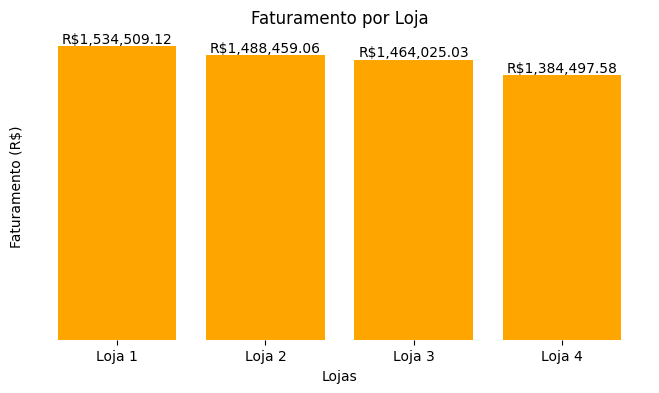

In [5]:
plt.figure(figsize=(8,4))
plt.bar(faturamento_por_loja.index, faturamento_por_loja['Faturamento'], color = 'orange')
plt.title("Faturamento por Loja")
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")

# Remover valores do eixo Y
plt.yticks([])

# Exibir valores acima das barras
for i, valor in enumerate(faturamento_por_loja['Faturamento']):
    plt.text(i, valor, f"R${valor:,.2f}", ha='center', va='bottom')

# 🔥 Remover caixa (todas as bordas)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

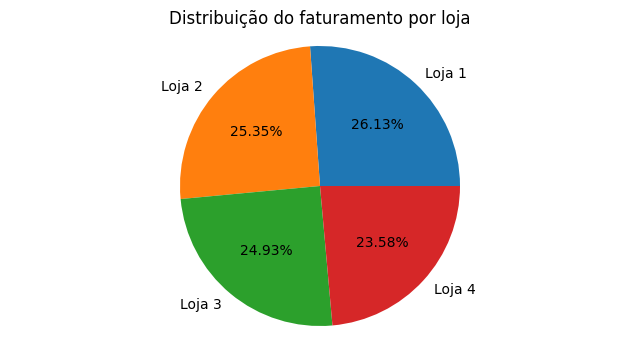

In [6]:
plt.figure(figsize=(8,4))
plt.pie(faturamento_por_loja['Faturamento'], labels= faturamento_por_loja.index, autopct='%.2f%%')
plt.title("Distribuição do faturamento por loja")
plt.axis('equal')

plt.show()

# 2. Vendas por Categoria

In [7]:
cat1 = loja1.groupby('Categoria do Produto')['Produto'].count()
cat2 = loja2.groupby('Categoria do Produto')['Produto'].count()
cat3 = loja3.groupby('Categoria do Produto')['Produto'].count()
cat4 = loja4.groupby('Categoria do Produto')['Produto'].count()

# Criando um dataframe de cada loja, agrupando por categoria, resetando o índice e adicionando a coluna LOJA
df1 = cat1.reset_index()
df1['Loja'] = 'Loja 1'

df2 = cat2.reset_index()
df2['Loja'] = 'Loja 2'

df3 = cat3.reset_index()
df3['Loja'] = 'Loja 3'

df4 = cat4.reset_index()
df4['Loja'] = 'Loja 4'

# unir todas as lojas por categoria
df_categorias = pd.concat([df1, df2, df3, df4], ignore_index=True)
df_categorias.columns = ["Categoria", "Vendas", "Loja"]

In [8]:
df_categorias.head()

,Categoria,Vendas,Loja
0,brinquedos,324,Loja 1
1,eletrodomesticos,312,Loja 1
2,eletronicos,448,Loja 1
3,esporte e lazer,284,Loja 1
4,instrumentos musicais,182,Loja 1


In [9]:
# Categoria mais vendida de cada loja
df_categorias.loc[df_categorias.groupby("Loja")["Vendas"].idxmax()]

,Categoria,Vendas,Loja
6,moveis,465,Loja 1
14,moveis,442,Loja 2
22,moveis,499,Loja 3
30,moveis,480,Loja 4


In [10]:
# Categoria mais vendida no geral
df_categorias.groupby("Categoria")["Vendas"].sum().sort_values(ascending=False)

,Vendas
Categoria,
moveis,1886
eletronicos,1772
brinquedos,1290
eletrodomesticos,1149
esporte e lazer,1113
instrumentos musicais,753
livros,742
utilidades domesticas,730


In [11]:
tabela_comparativa = df_categorias.pivot_table(
    index="Categoria",
    columns="Loja",
    values="Vendas",
    fill_value=0
)

print(tabela_comparativa)

Loja                   Loja 1  Loja 2  Loja 3  Loja 4
Categoria                                            
brinquedos              324.0   313.0   315.0   338.0
eletrodomesticos        312.0   305.0   278.0   254.0
eletronicos             448.0   422.0   451.0   451.0
esporte e lazer         284.0   275.0   277.0   277.0
instrumentos musicais   182.0   224.0   177.0   170.0
livros                  173.0   197.0   185.0   187.0
moveis                  465.0   442.0   499.0   480.0
utilidades domesticas   171.0   181.0   177.0   201.0


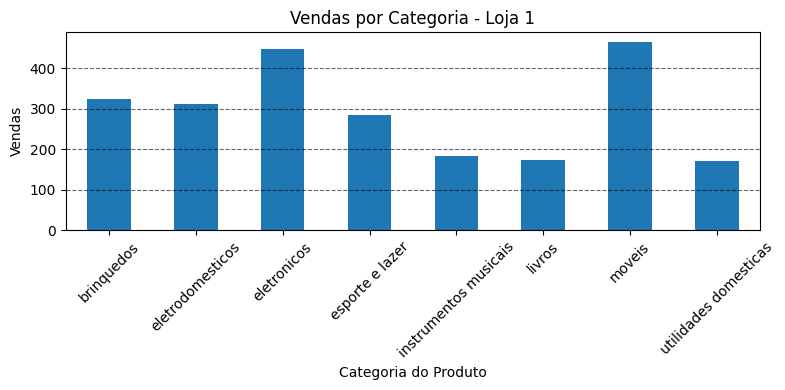

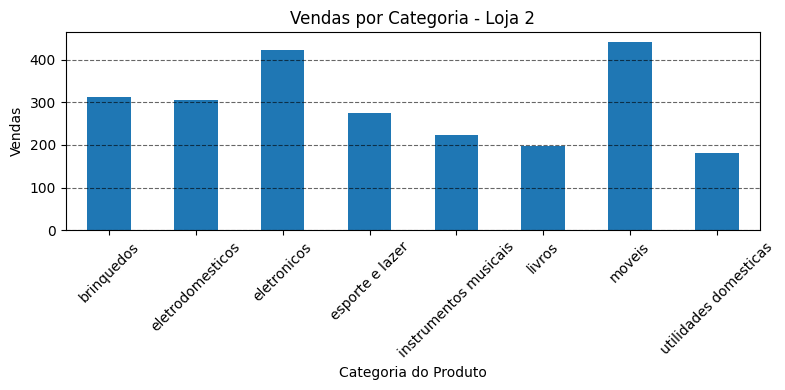

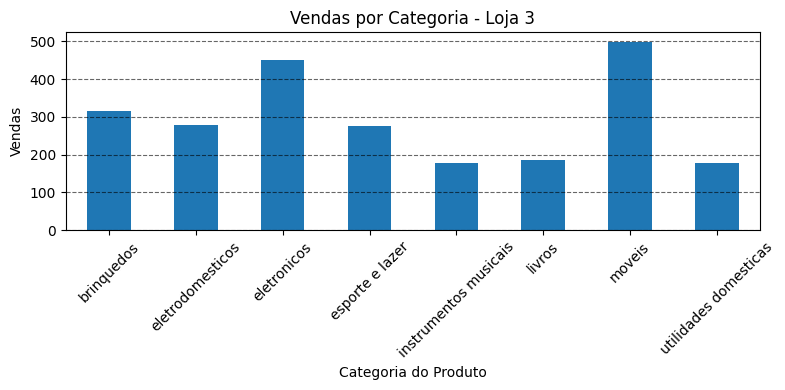

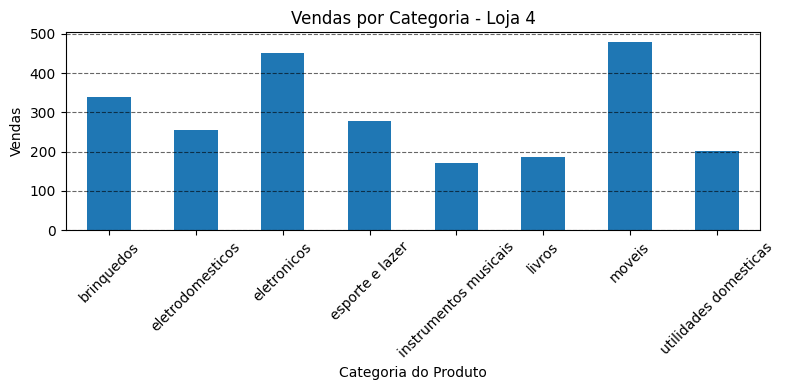

In [12]:
listas = [
    ("Loja 1", cat1),
    ("Loja 2", cat2),
    ("Loja 3", cat3),
    ("Loja 4", cat4)
]

for nome, tabela in listas:
    plt.figure(figsize=(8,4))
    tabela.plot(kind="bar")
    plt.title(f"Vendas por Categoria - {nome}")
    plt.ylabel("Vendas")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle = '--', alpha = 0.6, color = 'black')
    plt.show()


# 3. Média de Avaliação das Lojas


In [13]:
df_avaliacao_media = lojas.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)
df_avaliacao_media = df_avaliacao_media.to_frame('Avaliação da compra')
df_avaliacao_media

,Avaliação da compra
Loja,
Loja 3,4.048326
Loja 2,4.037304
Loja 4,3.995759
Loja 1,3.976685


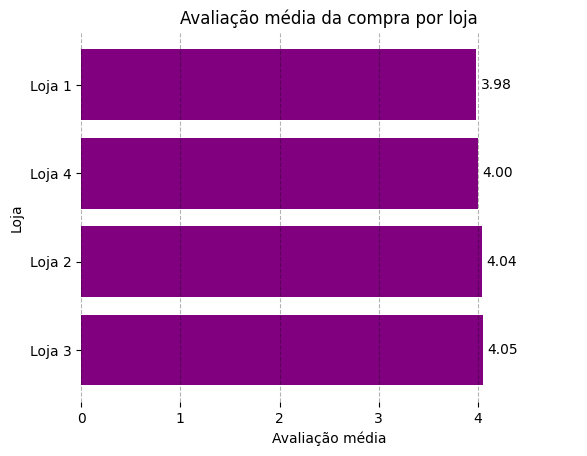

In [14]:
plt.figure()
plt.barh(df_avaliacao_media.index, df_avaliacao_media['Avaliação da compra'], color = 'purple')
plt.xlabel('Avaliação média')
plt.ylabel('Loja')
plt.title('Avaliação média da compra por loja')
plt.grid(axis='x', linestyle = '--', alpha = 0.3, color = 'black')

# ➤ ESCALA DO EIXO
plt.xlim(0, 5)
# ➤ EIXO X indo de 1 em 1
plt.xticks(range(0, 5, 1))

# Tirar bordas do gráfico (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# ➤ ADIÇÃO DOS VALORES NAS BARRAS
for i, valor in enumerate(df_avaliacao_media['Avaliação da compra']):
    plt.text(
        valor + 0.05,        # pequeno deslocamento à direita
        i,
        f'{valor:.2f}',      # duas casas decimais
        va='center',
        fontsize=10
    )

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [15]:
# Agrupamento de cada loja por produtos

produtos1 = loja1.groupby('Produto')['Preço'].count().sort_values(ascending=False)
produtos2 = loja2.groupby('Produto')['Preço'].count().sort_values(ascending=False)
produtos3 = loja3.groupby('Produto')['Preço'].count().sort_values(ascending=False)
produtos4 = loja4.groupby('Produto')['Preço'].count().sort_values(ascending=False)

produtos1 = produtos1.to_frame('Vendas')
produtos2 = produtos2.to_frame('Vendas')
produtos3 = produtos3.to_frame('Vendas')
produtos4 = produtos4.to_frame('Vendas')

In [16]:
# Produtos mais vendidos Loja 1

display(produtos1.head(3))
display(produtos1.tail(3))

,Vendas
Produto,
TV Led UHD 4K,60
Micro-ondas,60
Guarda roupas,60


,Vendas
Produto,
Panela de pressão,35
Celular ABXY,33
Headset,33


In [17]:
# Produtos mais vendidos Loja 2

display(produtos2.head(3))
display(produtos2.tail(3))

,Vendas
Produto,
Iniciando em programação,65
Micro-ondas,62
Bateria,61


,Vendas
Produto,
Impressora,34
Mesa de jantar,34
Jogo de tabuleiro,32


In [18]:
# Produtos mais vendidos Loja 3

display(produtos3.head(3))
display(produtos3.tail(3))

,Vendas
Produto,
Kit banquetas,57
Mesa de jantar,56
Cama king,56


,Vendas
Produto,
Jogo de copos,36
Mochila,36
Blocos de montar,35


In [19]:
# Produtos mais vendidos Loja 4

display(produtos4.head(3))
display(produtos4.tail(3))

,Vendas
Produto,
Cama box,62
Faqueiro,59
Cama king,56


,Vendas
Produto,
Violão,37
Guarda roupas,34
Guitarra,33


# 5. Frete Médio por Loja

In [20]:
df_frete = lojas.groupby('Loja')['Frete'].mean().sort_values(ascending=False)
df_frete = df_frete.to_frame('Frete_medio')
df_frete

,Frete_medio
Loja,
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.278997


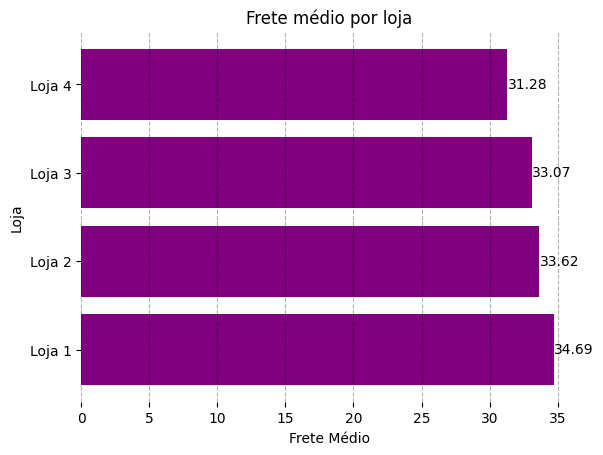

In [21]:
plt.figure()
plt.barh(df_frete.index, df_frete['Frete_medio'], color = 'purple')
plt.xlabel('Frete Médio')
plt.ylabel('Loja')
plt.title('Frete médio por loja')
plt.grid(axis='x', linestyle = '--', alpha = 0.3, color = 'black')

# Tirar bordas do gráfico (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# ➤ ADIÇÃO DOS VALORES NAS BARRAS
for i, valor in enumerate(df_frete['Frete_medio']):
    plt.text(
        valor + 0.05,        # pequeno deslocamento à direita
        i,
        f'{valor:.2f}',      # duas casas decimais
        va='center',
        fontsize=10
    )

plt.show()

# Relatório de Análise de Desempenho - Alura Store

Assunto: Recomendação de venda de unidade da rede Alura Store

## 🎯 Objetivo
Este relatório apresenta a análise dos dados de vendas das quatro lojas da rede Alura Store. O objetivo principal é identificar a loja com menor eficiência operacional (faturamento, volume de vendas e satisfação do cliente) para recomendar qual unidade deve ser vendida, permitindo o início de um novo empreendimento.

## 💰 Análise de Faturamento
- A métrica principal utilizada para avaliar a performance financeira foi o faturamento total gerado por cada loja no período analisado. Os dados consolidados indicam os seguintes resultados:

1) Loja 1: R$ 1.534.509,12

2) Loja 2: R$ 1.488.459,06

3) Loja 3: R$ 1.464.025,03

4) Loja 4: R$ 1.384.497,58

- Insight: A Loja 4 apresentou o menor faturamento entre todas as unidades, arrecadando cerca de R$ 150.000,00 a menos que a líder (Loja 1). Este é um indicador crítico de baixa performance relativa.

## 🏷️ Análise de Vendas por Categoria
- Ao analisar a distribuição de vendas por categoria, observou-se que a categoria de Móveis é a mais forte em todas as unidades, seguida por Eletrônicos.

## ⭐ Nível de satisfação dos clientes por loja
- Ao analisarmos o indicador de satisfação dos clientes, notamos um cenário de grande homogeneidade entre as filiais. Todas as unidades apresentam um desempenho muito similar, gravitando consistentemente em torno de 4,0 pontos.

- Essa margem mínima de diferença entre as notas indica um empate técnico na qualidade percebida pelo consumidor. Portanto, a decisão estratégica de venda não deve ser pautada na avaliação média, uma vez que este indicador não aponta falhas operacionais específicas em nenhuma loja. O problema de faturamento da Loja 4, consequentemente, deve ser atribuído a outros fatores (como logística/frete), e não à qualidade do atendimento ou do produto.

## 🚚 Custo médio de frete

- Ao analisarmos os custos logísticos, identificamos uma baixa variabilidade no valor do frete médio entre as quatro unidades, oscilando numa faixa estreita entre 31,00 e 35,00.

- Um ponto de destaque é que, embora a Loja 4 apresente um frete competitivo (situado na faixa inferior de preço), essa vantagem logística não foi suficiente para alavancar seu desempenho comercial.

## 💡 Conclusão e Recomendação
- Com base estritamente nos dados financeiros apresentados, a loja que demonstra a menor eficiência comercial é a Loja 4.

- Recomendação: Recomendamos a venda da Loja 4.

## ⚖️ Justificativa:

- Menor Receita: A unidade gerou o menor volume financeiro total (R$ 1.38 Mi), ficando consistentemente atrás das outras três lojas.

- Eficiência: A diferença de faturamento em relação às outras unidades sugere que esta loja possui o menor retorno sobre a operação, tornando-a a candidata ideal para desinvestimento.